# HW3_3 - Linear classification

Learning contents:
* Least squares for classification
* Perceptron
* Logistic regression
* Extra: multi-class logistic regression

In [63]:
# Dependencies
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set() # this import just makes the plots prettier
import numpy as np

## Data
We'll be working with a dataset of handwritten digits. 
Let visualise some examples.

In [64]:
# We're using a subset of two classes for now
digits = load_digits(n_class=2)

In [65]:
# Handy plotting functions
x_min, x_max = -40, 40
y_min, y_max = -40, 40

def plot_examples():
    show_num = 4
    _, axes = plt.subplots(1, show_num)
    images_and_labels = list(zip(digits.images, digits.target))
    for ax, (image, label) in zip(axes[:], images_and_labels[:show_num]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Label: %i' % label)

def plot_scatter(data, target, n_class=2):
    plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', n_class))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar();
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

def plot_decision_boundary(data, weights):
    raise NotImplementedError("You should fill this is")

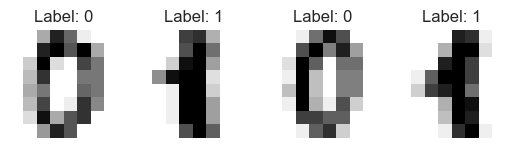

In [66]:
plot_examples()

In [67]:
# The dataset contains 2D data in the form of the `images` attribute, 
# as well as a 1D-version called `data`, where the images have been flattened. 
np.array_equal(digits.images[0].flatten(), digits.data[0])

True

In [68]:
# We can get a 2D version of the data using PCA
pca = PCA(n_components=2)
X = pca.fit_transform(digits.data) # this is the representation, we'll be working with

In [69]:
# Out targets are in the set {0,1}
t_01 = digits.target

C:\Users\User\AppData\Local\Temp\ipykernel_9280\1674155847.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', n_class))


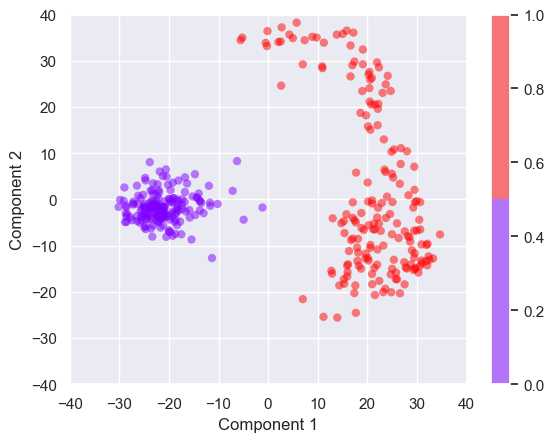

In [70]:
# Let's plot all the data in 2D
plot_scatter(X, t_01)

## 1) Least Squares

### 1.1) Find the weight vector using Least Squares for classification
Hint: Remember to augment the data with a column of 1's

In [71]:
# Augment the data with a column of 1's
X_new = np.column_stack((np.ones(X.shape[0]), X))

# Solve the linear equation using Least Squares
w = np.linalg.inv(X_new.T.dot(X_new)).dot(X_new.T).dot(t_01)

print("Weight vector:")
print(w)

Weight vector:
[0.50555556 0.02182423 0.00478603]


### 1.2) Create class predictions using the weight vector
You should be able to correctly classify all data

In [72]:
# Calculate the dot product of X_augmented and the weight vector w
predictions = np.dot(X_new, w)

# Apply threshold to assign class labels
class_predictions = np.where(predictions >= 0.5, 1, 0)

print("Class Predictions:")
print(class_predictions)

Class Predictions:
[0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1
 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0
 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0]


### 1.3) Plot the decision boundary 
Hint: You can do this either by plotting a line on the boundary or creating a mesh of all predictions

C:\Users\User\AppData\Local\Temp\ipykernel_9280\1674155847.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', n_class))


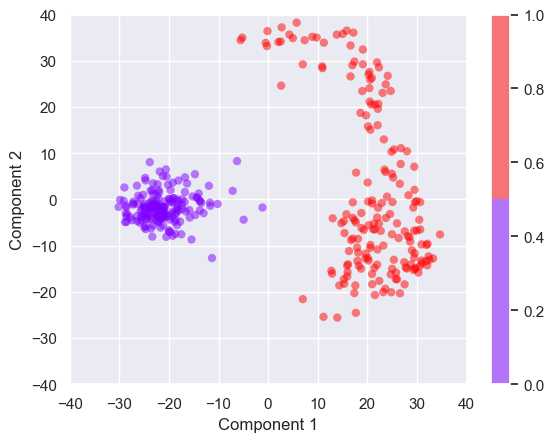

In [73]:
plot_scatter(X, t_01)
# plot_decision_boundary(X, W_least_squares)

C:\Users\User\AppData\Local\Temp\ipykernel_9280\1559360879.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data[:, 0], data[:, 1], c=t_01, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', 2))


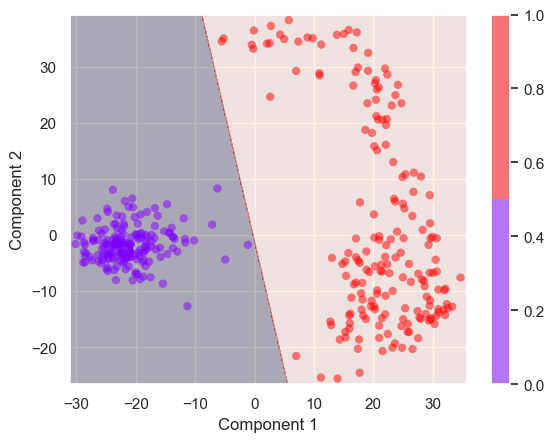

In [74]:
def plot_decision_boundary(data, weights):
    # Define the range of the plot
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Create a meshgrid of points
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_points_augmented = np.column_stack((np.ones(mesh_points.shape[0]), mesh_points))
    
    # Make predictions on the meshgrid points
    predictions = np.dot(mesh_points_augmented, weights)
    class_predictions = np.where(predictions >= 0.5, 1, 0)
    class_predictions = class_predictions.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, class_predictions, alpha=0.3)
    plt.scatter(data[:, 0], data[:, 1], c=t_01, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', 2))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar()
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

# Plot the decision boundary
plot_decision_boundary(X, w)

## 2) Perceptron

A learning_rate of 0.1 should do the job.
Hint: remember to change the target representation range

In [75]:
learning_rate = 0.1

# Adjust the target representation range to -1 and 1
t_pm1 = np.where(t_01 == 0, -1, 1)

# Initialize the weight vector with zeros
w_perceptron = np.zeros(X_augmented.shape[1])

# Perceptron algorithm
for i in range(len(X_augmented)):
    prediction = np.dot(X_augmented[i], w_perceptron)
    if prediction >= 0:
        y_pred = 1
    else:
        y_pred = -1
    
    # Update the weights based on the prediction and target value
    delta_w = learning_rate * (t_pm1[i] - y_pred) * X_augmented[i]
    w_perceptron += delta_w

print("Weight vector (Perceptron):")
print(w_perceptron)

Weight vector (Perceptron):
[0.2        8.34451078 3.54717171]


### 2.2) Perform class-predictions
Again, you should be able to classify all correctly

In [76]:
# Calculate the dot product of X_augmented and the weight vector w_perceptron
predictions_perceptron = np.dot(X_new, w_perceptron)

# Apply threshold to assign class labels
class_predictions_perceptron = np.where(predictions_perceptron >= 0, 1, 0)

print("Class Predictions (Perceptron):")
print(class_predictions_perceptron)

Class Predictions (Perceptron):
[0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1
 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0
 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0]


### 2.3) Plot the decision boundary

C:\Users\User\AppData\Local\Temp\ipykernel_9280\651939905.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data[:, 0], data[:, 1], c=t_01, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', 2))


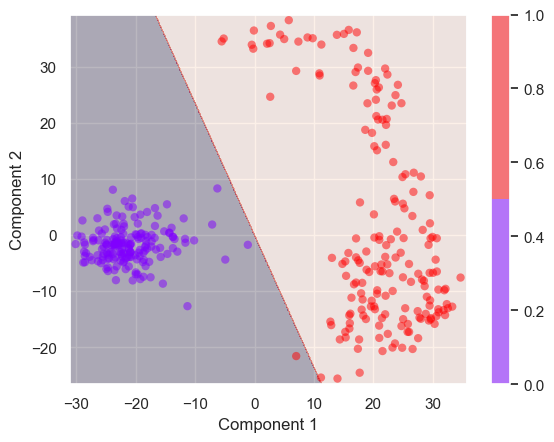

In [77]:
def plot_decision_boundary_perceptron(data, weights):
    # Define the range of the plot
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Create a meshgrid of points
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_points_augmented = np.column_stack((np.ones(mesh_points.shape[0]), mesh_points))
    
    # Make predictions on the meshgrid points
    predictions_perceptron = np.dot(mesh_points_augmented, weights)
    class_predictions_perceptron = np.where(predictions_perceptron >= 0, 1, 0)
    class_predictions_perceptron = class_predictions_perceptron.reshape(xx.shape)
    
# Plot the decision boundary
    plt.contourf(xx, yy, class_predictions_perceptron, alpha=0.3)
    plt.scatter(data[:, 0], data[:, 1], c=t_01, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', 2))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar()
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

# Plot the decision boundary for Perceptron
plot_decision_boundary_perceptron(X, w_perceptron)

## 3) Logistic Regression
### 3.1) Find the weight vector using the Logistic Regression

In [78]:
# initialise W_0 randomly
np.random.seed(42)
W_0 = 2 * np.random.random((1, 3)) -1 # random values in the range [-1,1]

# Our target vectors should be {0, 1}
t_01 = digits.target

In [79]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
logistic_regression = LogisticRegression()

# Fit the logistic regression model
logistic_regression.fit(X_new, t_01)

# Get the weight vector
w_logistic = logistic_regression.coef_.flatten()

print("Weight vector (Logistic Regression):")
print(w_logistic)

Weight vector (Logistic Regression):
[1.68339564e-06 9.56002545e-01 2.31927290e-01]


### 3.2) Perform class-predictions

In [80]:
# Calculate the dot product of X_augmented and the weight vector
predictions_logistic = np.dot(X_new, w_logistic)

# Apply threshold to assign class labels
class_predictions_logistic = np.where(predictions_logistic >= 0.5, 1, 0)

print("Class Predictions (Logistic Regression):")
print(class_predictions_logistic)

Class Predictions (Logistic Regression):
[0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1
 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0
 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0]


### 3.3) Plot the decision boundary

C:\Users\User\AppData\Local\Temp\ipykernel_9280\1949863680.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data[:, 0], data[:, 1], c=t_01, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', 2))


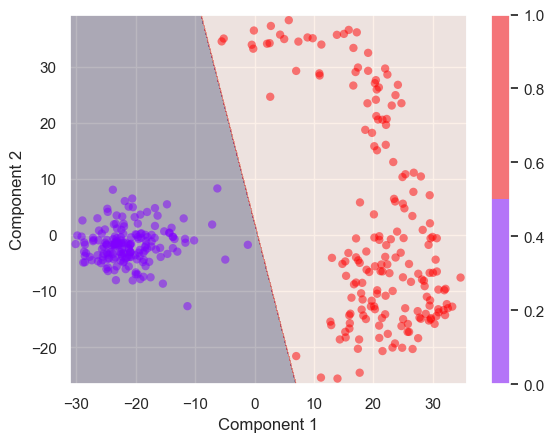

In [81]:
def plot_decision_boundary_logistic(data, weights):
    # Define the range of the plot
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Create a meshgrid of points
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_points_augmented = np.column_stack((np.ones(mesh_points.shape[0]), mesh_points))
    
    # Make predictions on the meshgrid points
    predictions_logistic = np.dot(mesh_points_augmented, weights)
    class_predictions_logistic = np.where(predictions_logistic >= 0.5, 1, 0)
    class_predictions_logistic = class_predictions_logistic.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, class_predictions_logistic, alpha=0.3)
    plt.scatter(data[:, 0], data[:, 1], c=t_01, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', 2))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar()
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

# Plot the decision boundary for Logistic Regression
plot_decision_boundary_logistic(X, w_logistic)

## 4) Multi-class logistic regression
Repeat 3) but now for multiple classes, i.e. compute the weight matrix, perform predictions (you shold be able to get about 93% accuracy) and plot decision boundaries.

Hint: You will need to use a one-hot encoding of the targets

In [82]:
# Data
n_class = 3
digits = load_digits(n_class=n_class)
pca = PCA(n_components=2)
X_mult = pca.fit_transform(digits.data)

learning_rate = 0.1

# We need to do a one_hot encoding of our data:
# I.e. 0 -> [1,0,0], 1 -> [0,1,0], 2 -> [0,0,1]
def one_hot(targets, n_class=n_class):
    res = np.eye(n_class)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[n_class])

t_oh = one_hot(digits.target, n_class)

C:\Users\User\AppData\Local\Temp\ipykernel_9280\1674155847.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', n_class))


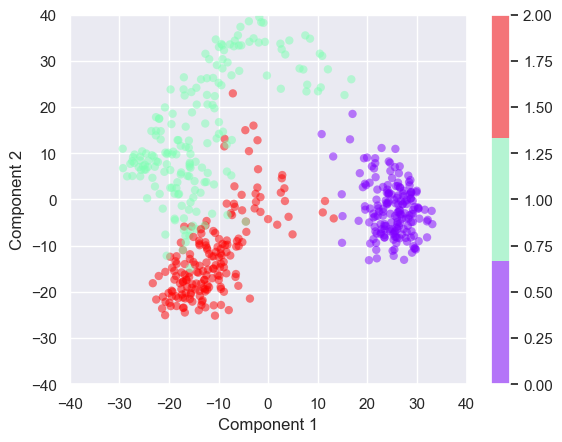

In [83]:
plot_scatter(X_mult, digits.target, n_class=n_class)

## 5) Multi-class logistic regression on original data representation
Repeat exercise 4), but use the original data representation instead.
You can omit the plots.

Hint: To get 100% accuracy, you can try to:
- Rescale your data to the range [0,1]
- Run 1000 epochs with learning_rate = 0.1

# Find the weights

In [84]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Rescale the data to the range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(digits.data)

# Create an instance of LogisticRegression
logistic_regression_multi = LogisticRegression(max_iter=1000, C=1.0, multi_class='multinomial', solver='sag', random_state=42)

# Fit the logistic regression model
logistic_regression_multi.fit(X_scaled, digits.target)

# Get the weight vectors
w_multi = logistic_regression_multi.coef_

print("Weight vectors (Multi-class Logistic Regression):")
print(w_multi)

Weight vectors (Multi-class Logistic Regression):
[[ 0.00000000e+00 -7.31957157e-02 -2.12869106e-01  1.31033827e-01
   6.91799138e-02 -5.02701277e-01 -2.30066794e-01  0.00000000e+00
  -8.65374786e-05 -6.24214142e-03  1.06573534e-01  1.07015195e-01
  -1.33035550e-01  2.31092510e-02 -1.37723167e-01  0.00000000e+00
  -1.03861811e-01  2.63830287e-02  4.66149656e-01 -5.10049652e-01
  -8.74662357e-01  3.19014159e-01  2.95528720e-02  0.00000000e+00
  -1.03261364e-01  3.28561237e-01  6.87961442e-01 -4.71561339e-01
  -8.81723704e-01  1.56488112e-01  5.14000246e-01  0.00000000e+00
   0.00000000e+00  7.27578939e-01  8.58042173e-01 -5.80810934e-01
  -8.23867544e-01  2.37165323e-01  6.38718053e-01  0.00000000e+00
   0.00000000e+00  3.64926534e-01  7.41435246e-01 -6.76063637e-01
  -4.72545260e-01  4.60616524e-01  5.46217336e-01 -1.36579212e-02
  -1.50072156e-02 -6.72827613e-02  4.10512430e-01 -3.91463392e-02
  -1.30857746e-01  1.57386782e-01 -2.89727716e-01 -1.16447723e-01
  -1.50072156e-02 -8.54736

# Perform class-predictions

In [85]:
# Calculate the dot product of X_scaled and the weight vectors
predictions_multi = np.dot(X_scaled, w_multi.T)

# Get the class predictions by selecting the class with the highest dot product value
class_predictions_multi = np.argmax(predictions_multi, axis=1)

print("Class Predictions (Multi-class Logistic Regression):")
print(class_predictions_multi)

Class Predictions (Multi-class Logistic Regression):
[0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2 0 0 1 2 1 1 1 1 0 1 2 2
 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2 0 0 1 2 1 1 1 1 0 1
 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2 0 0 1 2 1 1 1 1
 0 1 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2 0 0 1 2 1 1
 1 1 0 1 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2 0 0 1 2
 1 1 1 1 0 1 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2 0 0
 1 2 1 1 1 1 0 1 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2
 0 0 1 2 1 1 1 1 0 1 2 2 2 0 1 2 0 1 2 0 1 2 0 0 1 1 2 2 0 1 2 1 0 2 2 0 0
 1 2 1 1 1 1 0 1 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 0 1 2 1 0 2 2 0 0
 1 2 1 1 1 1 0 1 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0 2 2
 0 0 1 2 1 1 1 1 0 1 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2 1 0
 2 2 0 0 1 2 1 1 1 1 0 1 2 2 2 0 0 1 2 0 1 2 0 1 2 0 0 1 1 0 0 2 2 2 0 1 2
 1 0 2 2 0 0 1 2 1 1 1 1 0 1 2 2 2 0 0 1 2 0 1 